In [2]:
import pandas as pd
import numpy as np
import math
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.stats import shapiro
from scipy.stats.stats import pearsonr


%matplotlib inline

In [3]:
#import excel file
df = pd.ExcelFile('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-levin/molot_hardcorp/Blogs_1.xlsx')

In [4]:
df = df.parse('Sheet1')

In [5]:
#look at the data
df

,Country,Source / Medium,Device Category,Sessions,Users,% Exit,Entrances,page
0,Nigeria,email / cams,mobile,5560,4942,0.612976,5563,Page 177
1,Pakistan,email / cams,mobile,3774,3548,0.518483,3774,Page 177
2,Bangladesh,email / cams,mobile,2088,1948,0.601048,2088,Page 177
3,Pakistan,email / cams,desktop,1274,1145,0.446565,1270,Page 177
4,United States,email / cams,mobile,1031,935,0.678284,1031,Page 177
...,...,...,...,...,...,...,...,...
995,Pakistan,(direct) / (none),desktop,35,35,0.282609,35,Page 237
996,Vietnam,(direct) / (none),desktop,35,32,0.972222,35,Page 122
997,Belarus,google / organic,desktop,34,34,0.486486,34,Page 159
998,Egypt,email / cams,mobile,34,31,0.733333,34,Page 51


In [6]:
df.dtypes

Country             object
Source / Medium     object
Device Category     object
Sessions             int64
Users                int64
% Exit             float64
Entrances            int64
page                object
dtype: object

In [7]:
#rename column names to the appropriate format
df = df.rename(columns={'Country' : 'country',
                        'Source / Medium' : 'source_medium', 
                        'Device Category' : 'device_category',
                        'Sessions' : 'sessions',
                        'Users' : 'users',
                        '% Exit' : '%_exits',
                        'Entrances' : 'entrances'})

In [8]:
# We need to calculate number of exits. We can't do it because we don't have number of pageviews
# However, Within the framework of this task, we will make the assumption that users visit our page once per session.
# Thus, calculate number of exits as sessions*%_exits
df['exits'] = df.sessions * df['%_exits']
df.exits = df.exits.round(0)
df = df.astype({'exits' : 'int'})

# 1.Which three blog pages are most popular among users? In addition, what are the top 3 traffic sources?

In [9]:
# Look at the number of users and sessions
top_blogs = df.groupby('page', as_index=False).agg({'users' : 'sum', 'sessions' : 'sum'}) \
                                  .sort_values(['users', 'sessions'], ascending=False)
top_blogs
# We can see that first two blogs are leaders in the number of users and sessions
# The following 2 blogs share 3rd place depending on which indicator to look at: users or sessions

,page,users,sessions
86,Page 177,26380,29061
191,Page 37,15985,18080
148,Page 232,10035,10275
197,Page 42,9203,10883
2,Page 100,8515,9424
...,...,...,...
211,Page 55,5,53
111,Page 2,2,92
63,Page 156,1,47
130,Page 216,1,46


In [10]:
# Put the first 4 blogs into a list
top_blogs_list = top_blogs.head(4).page.to_list()
top_blogs_list

['Page 177', 'Page 37', 'Page 232', 'Page 42']

In [15]:
# Now let's look at the traffic sources
df.source_medium = df.source_medium.str.lower()
top_sources = df.groupby('source_medium', as_index=False).agg({'users' : 'sum', 'sessions' : 'sum'}) \
                                  .sort_values(['users', 'sessions'], ascending=False)
top_sources.head(3)

,source_medium,users,sessions
5,email / cams,76634,85922
0,(direct) / (none),28887,31116
10,fb / ext,11851,12791


In [16]:
# Put the first 3 sources into a list
top_sources_list = top_sources.head(3).source_medium.to_list()
top_sources_list

['email / cams', '(direct) / (none)', 'fb / ext']

In [17]:
# 1.Which three blog pages are most popular among users? In addition, what are the top 3 traffic sources?
# Answer: Top 4 blogs in the list 'top_blogs_list', top 3 sources in the list 'top_sources_list'
top_blogs_list

['Page 177', 'Page 37', 'Page 232', 'Page 42']

In [18]:
top_sources_list

['email / cams', '(direct) / (none)', 'fb / ext']

# 2.Analyze the following blog post's performance (describe the numbers and provide input)

In [19]:
# Our post: Page 100
# look at all posts with aggregation by all parametrs and add a new one - sessions per 1 user. 
pages_info = df.groupby('page', as_index=False) \
                .agg({'users' : 'sum', 
                    'sessions' : 'sum',
                    'exits' : 'sum',
                    'entrances' : 'sum',
                    'country' : pd.Series.nunique}) \
                .sort_values(['users', 'sessions'], ascending=False)
pages_info['ses_per_user'] = pages_info.sessions / pages_info.users
pages_info['%_exits'] = pages_info.exits / pages_info.sessions
pages_info
# As we can see our post on the 5th place by users and sessions.

,page,users,sessions,exits,entrances,country,ses_per_user,%_exits
86,Page 177,26380,29061,17811,29057,59,1.101630,0.612883
191,Page 37,15985,18080,15833,18074,20,1.131060,0.875719
148,Page 232,10035,10275,4369,10320,32,1.023916,0.425207
197,Page 42,9203,10883,9162,10867,12,1.182549,0.841863
2,Page 100,8515,9424,4492,9497,33,1.106753,0.476655
...,...,...,...,...,...,...,...,...
211,Page 55,5,53,47,54,1,10.600000,0.886792
111,Page 2,2,92,87,92,1,46.000000,0.945652
63,Page 156,1,47,34,48,1,47.000000,0.723404
130,Page 216,1,46,32,46,1,46.000000,0.695652


In [20]:
# Compare indicators of our post (users, sessions, % of exits, entrances, number of countries and sessions per 1 user) with
# the average values for all posts (mean, mode, quantilies) which we can get from the simple method describe()
a = pages_info.users.describe().to_frame(name='users')
b = pages_info.sessions.describe().to_frame(name='sessions')
c = pages_info['%_exits'].describe().to_frame(name='%_exits')
d = pages_info.entrances.describe().to_frame(name='entrances')
e = pages_info.country.describe().to_frame(name='country')
f = pages_info.ses_per_user.describe().to_frame(name='ses_per_user')
description = pd.concat([a, b, c, d, e, f], axis= 1 )

In [21]:
blog = pages_info.query('page == "Page 100"') \
                 .set_index('page')


In [22]:
description = pd.concat([description, blog], axis= 0 )
description
# Observations and Conclusions: 
# a) Users and sessions: our post has more users and sessions than 75% of all posts.
# Moreover, in the dataframe from the 1st question we can see that our post takes 5th place by number of users and sessions
# b) % of exits for our post is less than 75% of posts have. 
# c) our post has more entrances than 75% of posts. 
# d) Our post is read in 33 countries while 75% of posts are read in 2 countries and less. 
# e) Number of sessions per 1 user for our post is more than for 50% of post, but less than for top 25%.
# According to these figures our post is a good "performer" in comparison with others.

,users,sessions,%_exits,entrances,country,ses_per_user,exits
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,NaN
mean,525.234615,574.780769,0.739584,576.965385,2.403846,1.863487,NaN
std,2189.888466,2422.919897,0.222947,2424.461453,5.111346,5.625421,NaN
min,1.000000,34.000000,0.111111,34.000000,1.000000,0.680124,NaN
25%,52.750000,56.000000,0.616092,57.000000,1.000000,1.002500,NaN
50%,99.000000,105.000000,0.795873,106.500000,1.000000,1.051615,NaN
75%,286.500000,297.250000,0.926295,296.250000,2.000000,1.120525,NaN
max,26380.000000,29061.000000,1.000000,29057.000000,59.000000,47.000000,NaN
Page 100,8515.000000,9424.000000,0.476655,9497.000000,33.000000,1.106753,4492.0


In [23]:
# Let's calculate the % of users visiting our post from the total number of users
df.query('page == "Page 100"').users.sum()/df.users.sum()*100

6.235308763116849

In [24]:
# Let's calculate the % of sessions of our post from the total number of sessions
df.query('page == "Page 100"').sessions.sum()/df.sessions.sum()*100

6.30608325582329

In [25]:
# Let's look at the users distribution by country.
df.country.nunique()
# users from 84 countries are reading posts. 
# Our post is read by users from 33 countries. 

84

In [26]:
# Les't look at popularity of our post amoung users in different countries
# Look at the numbers for all posts
all_countries = df.groupby(['country'], as_index=False) \
                    .agg({'users' : 'sum', 
                        'sessions' : 'sum'}) \
                    .sort_values(['users'], ascending=False)
all_countries
# Top 5 countries where users are located are: Argentina, Pakistan, Nigeria, Bangladesh, Brazil

,country,users,sessions
3,Argentina,16147,18250
55,Pakistan,15248,15762
53,Nigeria,12732,14092
7,Bangladesh,8531,9137
12,Brazil,8406,8993
...,...,...,...
43,Libya,40,47
69,Taiwan,39,54
25,Georgia,39,84
60,Poland,34,38


In [27]:
# Now for our post
blog_countries = df.query('page == "Page 100"') \
                    .groupby(['country'], as_index=False) \
                    .agg({'users' : 'sum', 
                        'sessions' : 'sum'}) \
                    .sort_values(['users'], ascending=False)
blog_countries
# Top 5 countries for our post: Nigeria, Pakistan, United States, Turkey, Argentina. 

,country,users,sessions
18,Nigeria,2286,2586
19,Pakistan,1450,1527
30,United States,756,828
26,Turkey,744,832
1,Argentina,405,485
16,Morocco,382,422
27,Ukraine,243,261
20,Philippines,196,226
12,Indonesia,173,188
6,Egypt,170,183


In [28]:
# Now let's see what percentage of users in the country read our post
all_countries = all_countries.rename(columns={'users' : 'allblogs_users',
                                              'sessions' : 'allblogs_sessions'})
blog_countries = blog_countries.rename(columns={'users' : 'ourblog_users',
                                              'sessions' : 'ourblog_sessions'})

In [29]:
countries = all_countries.merge(blog_countries, how='inner', on='country')

In [30]:
countries['percantage_users'] = countries.ourblog_users / countries.allblogs_users*100
countries['percantage_sessions'] = countries.ourblog_sessions / countries.allblogs_sessions*100
countries.sort_values('allblogs_users', ascending=False)
# As we can see, our post is popular in 4 of the top 10 countries (10% and more users): Pakistan, Nigeria, US, Turkey. 

,country,allblogs_users,allblogs_sessions,ourblog_users,ourblog_sessions,percantage_users,percantage_sessions
0,Argentina,16147,18250,405,485,2.508206,2.657534
1,Pakistan,15248,15762,1450,1527,9.509444,9.687857
2,Nigeria,12732,14092,2286,2586,17.954760,18.350837
3,Bangladesh,8531,9137,156,161,1.828625,1.762066
4,Brazil,8406,8993,114,122,1.356174,1.356611
5,Colombia,6908,7709,109,119,1.577881,1.543650
6,United States,5838,6242,756,828,12.949640,13.264979
7,Ukraine,5838,6851,243,261,4.162384,3.809663
8,Egypt,3885,4313,170,183,4.375804,4.242986
9,Turkey,3815,4163,744,832,19.501966,19.985587


In [31]:
# Also look at the device_category for all posts and for our post
df.groupby(['device_category'], as_index=False) \
                    .agg({'users' : 'sum', 
                        'sessions' : 'sum'}) \
                    .sort_values(['users'], ascending=False)

,device_category,users,sessions
1,mobile,88769,97093
0,desktop,47703,52252
2,tablet,89,98


In [32]:
df.query('page == "Page 100"') \
                    .groupby(['device_category'], as_index=False) \
                    .agg({'users' : 'sum', 
                        'sessions' : 'sum'}) \
                    .sort_values(['users'], ascending=False)
# our post is visited by users most often from mobile devices

,device_category,users,sessions
1,mobile,8041,8967
0,desktop,474,457


In [52]:
# Also look at the source_medium for our post
df.query('page == "Page 100"') \
    .groupby(['source_medium'], as_index=False) \
                    .agg({'users' : 'sum', 
                        'sessions' : 'sum'}) \
                    .sort_values(['users'], ascending=False).head(1)
# The top source "(direct) / (none)"

,source_medium,users,sessions
0,(direct) / (none),5731,6356


# 3.Please  comment on the correlation between countries with high mobile user percentages and exit rates? Demonstrate using a chart showing 10 different countries.

In [34]:
# Aggregate sessions, users and exits by countries and devices.
country_analysis = df.groupby(['country', 'device_category'], as_index=False) \
    .agg({'sessions' : 'sum',
          'users' : 'sum',
          'exits' : 'sum'}) \
    .sort_values('country')
country_analysis

,country,device_category,sessions,users,exits
0,(not set),desktop,124,201,19
1,Albania,mobile,96,93,74
2,Algeria,desktop,53,45,34
3,Algeria,mobile,292,250,171
4,Argentina,desktop,8375,7419,6160
...,...,...,...,...,...
142,Venezuela,desktop,807,721,552
143,Venezuela,mobile,808,693,634
145,Vietnam,mobile,563,516,360
144,Vietnam,desktop,1845,1729,1482


In [35]:
# Calculate % mobile and desktop sessions by countries and % of exits for all devices in each country.
# Create a new aggregation for this one.
a = df.groupby('country', as_index=False) \
    .agg({'sessions' : 'sum',
          'exits' : 'sum'}) \
    .sort_values('country')
a = a.rename(columns={'sessions' : 'total_sessions',
                      'exits' : 'total_exits'})

a['percantage_exits'] = a.total_exits / a.total_sessions

In [36]:
# Add new info to our main dataframe.
country_analysis = country_analysis.merge(a, how='inner', on='country')

In [37]:
# Now we can count percantage of session for each devices
country_analysis['percantage_devices'] = country_analysis.sessions / country_analysis.total_sessions

In [38]:
country_analysis.sort_values(['country', 'sessions'])

,country,device_category,sessions,users,exits,total_sessions,total_exits,percantage_exits,percantage_devices
0,(not set),desktop,124,201,19,124,19,0.153226,1.000000
1,Albania,mobile,96,93,74,96,74,0.770833,1.000000
2,Algeria,desktop,53,45,34,345,205,0.594203,0.153623
3,Algeria,mobile,292,250,171,345,205,0.594203,0.846377
4,Argentina,desktop,8375,7419,6160,18250,14159,0.775836,0.458904
...,...,...,...,...,...,...,...,...,...
142,Venezuela,desktop,807,721,552,1615,1186,0.734365,0.499690
143,Venezuela,mobile,808,693,634,1615,1186,0.734365,0.500310
144,Vietnam,mobile,563,516,360,2408,1842,0.764950,0.233804
145,Vietnam,desktop,1845,1729,1482,2408,1842,0.764950,0.766196


In [39]:
# According to our task, for our analysis leave only mobile devices
# Also, leave only that countries, where number of sessions > 100
mob_country = country_analysis.query('device_category == "mobile"').query('sessions > 100')

In [40]:
mob_country.head(10)

,country,device_category,sessions,users,exits,total_sessions,total_exits,percantage_exits,percantage_devices
3,Algeria,mobile,292,250,171,345,205,0.594203,0.846377
5,Argentina,mobile,9875,8728,7999,18250,14159,0.775836,0.541096
13,Bangladesh,mobile,6456,5997,3755,9137,5085,0.556528,0.706578
17,Bolivia,mobile,158,128,134,302,255,0.844371,0.523179
20,Bosnia & Herzegovina,mobile,110,103,77,150,108,0.720000,0.733333
22,Brazil,mobile,7056,6505,6086,8993,7025,0.781163,0.784610
25,Cameroon,mobile,156,143,103,208,135,0.649038,0.750000
26,Canada,mobile,251,224,179,415,287,0.691566,0.604819
29,Chile,mobile,309,282,264,507,432,0.852071,0.609467
31,China,mobile,1840,1743,1385,3159,2094,0.662868,0.582463


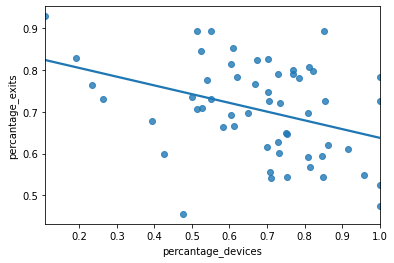

In [41]:
# Look at the scatterplot with linear regression and calculate correlation
sns.regplot(x = 'percantage_devices', y = 'percantage_exits', data =mob_country, ci=None) 

In [42]:
# Our variables should be normally distributed to count  Pearson's r.
# Check it using Shapiro test
shapiro(mob_country.percantage_devices)

ShapiroResult(statistic=0.9522795677185059, pvalue=0.026922650635242462)

In [43]:
shapiro(mob_country.percantage_exits)

ShapiroResult(statistic=0.9796894788742065, pvalue=0.4624769687652588)

In [44]:
# As we can see, percent devices isn't normally distributed. That's why we should use Spearman's r. 

In [45]:
# Spearmen's r is -0.32. 
# H0 - Pearson's r =0
# H1 - Pearson's r !=0
# Our p-value is less than 0.05. It means that we can't accept H0 and we should accept H1. 
ss.spearmanr(mob_country.percantage_devices, mob_country.percantage_exits)

SpearmanrResult(correlation=-0.32076568576502906, pvalue=0.015938553076080386)

In [46]:
# Also try to count using Pearson's r. 
# Pearson's r is -0.367.
np.corrcoef(mob_country.percantage_devices, mob_country.percantage_exits)

array([[ 1.        , -0.36657152],
       [-0.36657152,  1.        ]])

In [47]:
# H0 - Pearson's r =0
# H1 - Pearson's r !=0
# Our p-value is less than 0.05. It means that we can't accept H0 and we should accept H1. 
pearsonr(mob_country.percantage_devices, mob_country.percantage_exits)

(-0.3665715182930353, 0.00545694251439729)

In [48]:
# As we can see that there is statistically significant correlation between % of mobile sessions (users) and % of exits.
# This correlation is weak because 0.2 < Pearson's r < 0.5

In [49]:
# Visualize our correlation and highlight 10 countries according to our task

In [50]:
# Choose top 10 countries in the number of sessions
top10_for_chart = mob_country.sort_values('sessions', ascending=False).head(10)
top10_for_chart 

,country,device_category,sessions,users,exits,total_sessions,total_exits,percantage_exits,percantage_devices
93,Nigeria,mobile,12891,11704,7880,14092,8603,0.610488,0.914774
97,Pakistan,mobile,11212,10971,6273,15762,8551,0.542507,0.711331
5,Argentina,mobile,9875,8728,7999,18250,14159,0.775836,0.541096
22,Brazil,mobile,7056,6505,6086,8993,7025,0.781163,0.784610
13,Bangladesh,mobile,6456,5997,3755,9137,5085,0.556528,0.706578
33,Colombia,mobile,5938,5250,4968,7709,6161,0.799196,0.770269
81,Mexico,mobile,4226,3884,3886,4961,4436,0.894175,0.851844
41,Egypt,mobile,3489,3183,2505,4313,3010,0.697890,0.808950
137,United States,mobile,3289,3024,2125,6242,4420,0.708106,0.526914
127,Turkey,mobile,3135,2878,1752,4163,2261,0.543118,0.753063


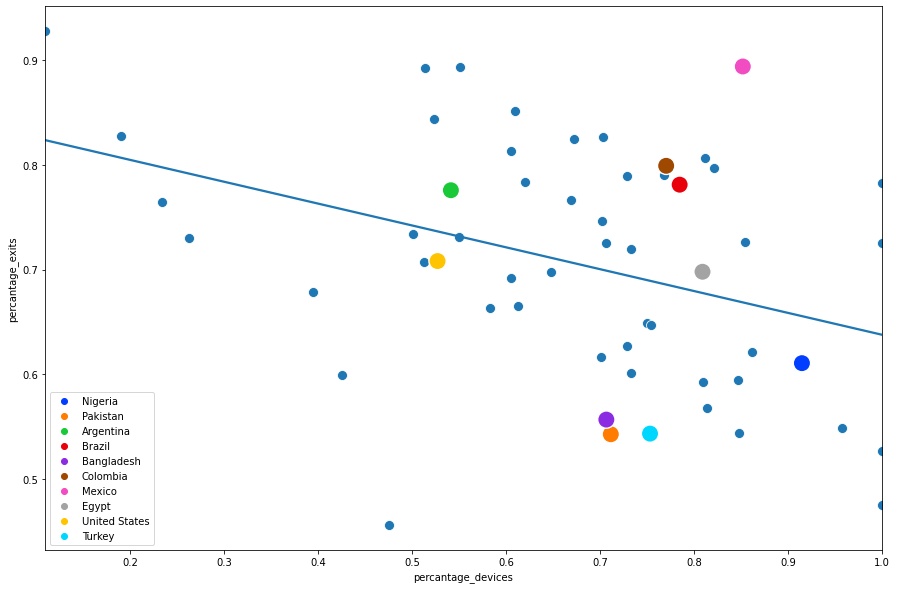

In [51]:
#Build scatterplot with liner regression and highlight top10 countries by sessions.
plt.figure(figsize=(15, 10))
sns.regplot(x = 'percantage_devices', y = 'percantage_exits', data=mob_country, ci=None) 
sns.scatterplot(x = 'percantage_devices', y = 'percantage_exits', data =mob_country, s=100)
sns.scatterplot(x = 'percantage_devices', y = 'percantage_exits', data =top10_for_chart, hue="country", palette ='bright', s=300, legend='auto')
plt.legend(loc='lower left')